# Analyze downloaded bird sound files 

## Introduction
The program analyze the bird song dataset downloaded with the file "AM - Download dataset.py" and checks the metadata itself.
Each folder saved have at least one file inside: json with metadata. 

> JSON is short for JavaScript Object Notation, and is a way to store information in an organized, easy-to-access manner. In a nutshell, it gives us a human-readable collection of data that we can access in a really logical manner. (source: https://www.copterlabs.com/json-what-it-is-how-it-works-how-to-use-it/)

If the algorithm found at least one file under searched term, those sound files are saved in the folder.

Script in the notebook returns:
- [x] Number of files for a given bird, 
- [x] Minimum, maximum, and average length of a file, 
- [ ] Number of sounds with more than 1 tag,
- [x] Number of sounds with specified quality (e.g. none - 460, A- 102 recordings, B - 230 recordigns, ...).

Next, it analyze the recordings and:
- [ ] Calculate the signal to noise ratio -> return min, max and average values, 
- [x] Shows 3 random bird-songs spectograms, melgrams and sound waves, 


In [1]:
import json
import pandas as pd

In [2]:
from AM_downloadDataset import read_data

In [3]:
countries = ['Poland', 'Germany', 'Slovakia', 'Czech', 'Lithuania']

# make and initialize dictionary of a bird
bird = {
        'gen':'Parus',
        'spec':'major',
        'country':'',
        'number of files': 
            {
            'total' : 0,
            'quality':{'A':0,
                        'B':0,
                        'C':0,
                        'D':0,
                        'E':0,
                        'F':0,
                      }
            },
        'length':{'min':0,
                      'max':0,
                      'mean':0,
                      'median':0
                      }
        }

pd.DataFrame(bird) 


gen   spec country  \
max      Parus  major           
mean     Parus  major           
median   Parus  major           
min      Parus  major           
quality  Parus  major           
total    Parus  major           

                                          number of files  length  
max                                                   NaN     0.0  
mean                                                  NaN     0.0  
median                                                NaN     0.0  
min                                                   NaN     0.0  
quality  {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}     NaN  
total                                                   0     NaN

In [4]:
from mutagen.mp3 import MP3
from statistics import mean, median

lengthData = list()
audioLength = []
for country in range(len(countries)):
        # find the driectory with recordings
        bird['country']=bird['country']+' ' + countries[country]
        path = '../data/xeno-canto-dataset/' + bird['gen'] + ' '+bird['spec'] +' cnt '+ countries[country] + ' type song'
        print('Loading data from folder ' + path)
        
        # load info about the quality of the recording from json file
        qualityData = read_data('q', path)
        bird['number of files']['total']=bird['number of files']['total']+len(qualityData)
        for quality in bird['number of files']['quality']:
             bird['number of files']['quality'][quality]=bird['number of files']['quality'][quality]+qualityData.count(quality)
        
        # load MP3 file of every recording and check the length of a file
        idData = read_data('id', path)
        for audioFile in range(len(idData)):
            audioLength.append(MP3(path+'/'+bird['gen']+idData[audioFile]+'.mp3').info.length) 
                        
        lengthData = list(audioLength) + list(lengthData)

bird['length']['max']=max(lengthData)
bird['length']['min']=min(lengthData)
bird['length']['mean']=mean(lengthData) 
bird['length']['median']=median(lengthData)  

pd.DataFrame(bird)       


Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Poland type song
Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Germany type song
Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Slovakia type song
Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Czech type song
Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Lithuania type song


gen   spec                                   country  \
max      Parus  major   Poland Germany Slovakia Czech Lithuania   
mean     Parus  major   Poland Germany Slovakia Czech Lithuania   
median   Parus  major   Poland Germany Slovakia Czech Lithuania   
min      Parus  major   Poland Germany Slovakia Czech Lithuania   
quality  Parus  major   Poland Germany Slovakia Czech Lithuania   
total    Parus  major   Poland Germany Slovakia Czech Lithuania   

                                           number of files      length  
max                                                    NaN  974.244375  
mean                                                   NaN  102.053273  
median                                                 NaN   58.004725  
min                                                    NaN    3.325813  
quality  {'A': 169, 'B': 145, 'C': 56, 'D': 46, 'E': 1,...         NaN  
total                                                  418         NaN

In [5]:
from random import sample

# find the driectory with recordings
path = '../data/xeno-canto-dataset/' + bird['gen'] + ' '+bird['spec'] + ' cnt '+ 'Poland' + ' type song'
print('Loading data from folder ' + path)

# load json file:  read all id numbers
idData = read_data('id', path)
qualityData = read_data('q',path)

# select random 5 recordings from Poland
randFiles = sample(range(len(idData)), 3)
print('Selected random files number:',randFiles)

Loading data from folder ../data/xeno-canto-dataset/Parus major cnt Poland type song
Selected random files number: [129, 114, 25]


In [6]:
import IPython.display as ipd

for audioFile in randFiles:
    # path of random file
    filePath = path+'/'+bird['gen']+idData[audioFile]+'.mp3'
    print('Play the file number '+ str(audioFile)+', quality: '+ qualityData[audioFile])
    # show the recording and allow to play it
    ipd.display(ipd.Audio(filePath))


Play the file number 129, quality: B


Play the file number 114, quality: B


Play the file number 25, quality: A


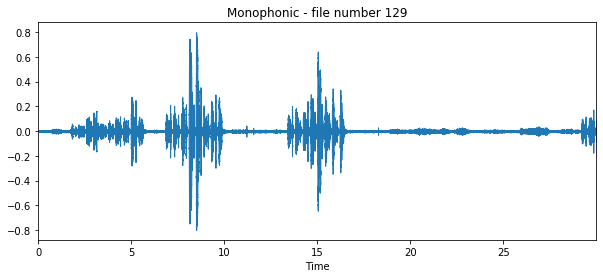

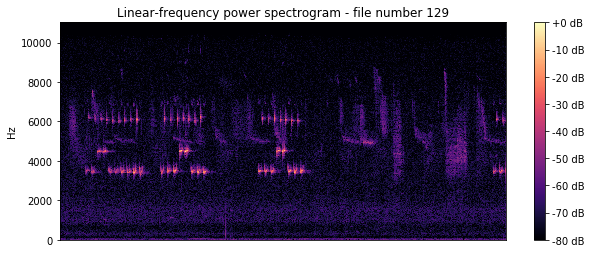

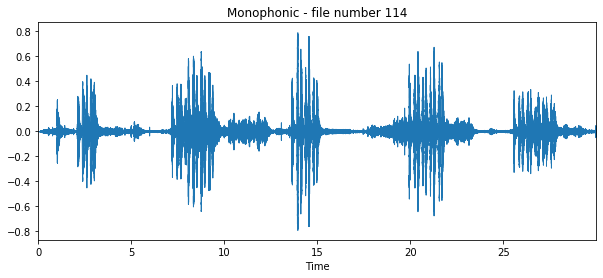

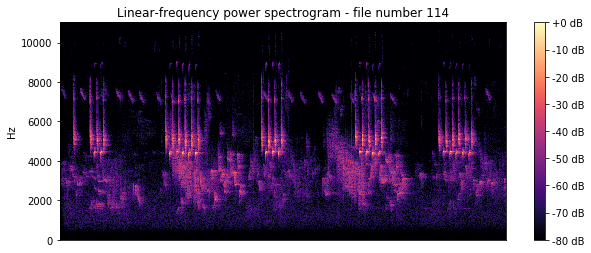

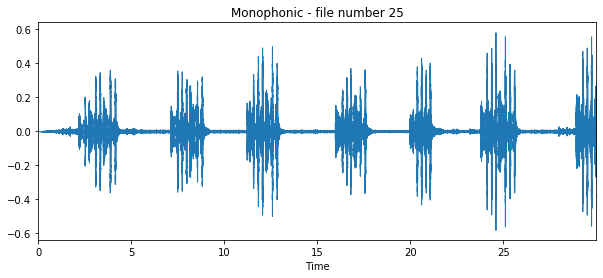

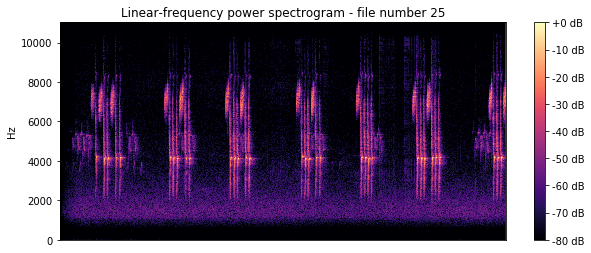

In [9]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np


for audioFile in randFiles:
    # path of random file
    filePath = path+'/'+bird['gen']+idData[audioFile]+'.mp3'

    # plot recording signal
    y, sr = librosa.load(filePath,duration=30)
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic - file number '+str(audioFile))
    plt.show()
    
    # plot spectogram
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram - file number '+str(audioFile))
    plt.show()


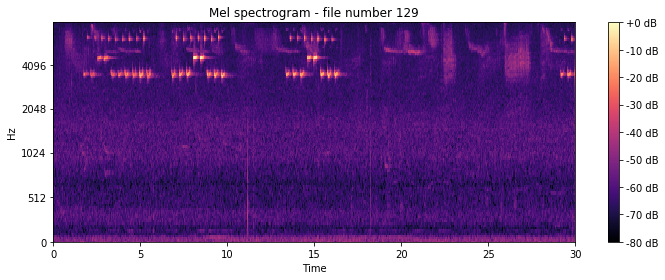

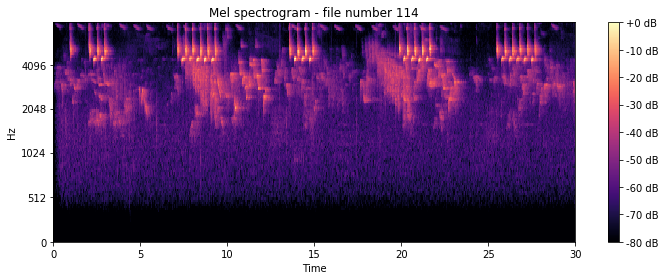

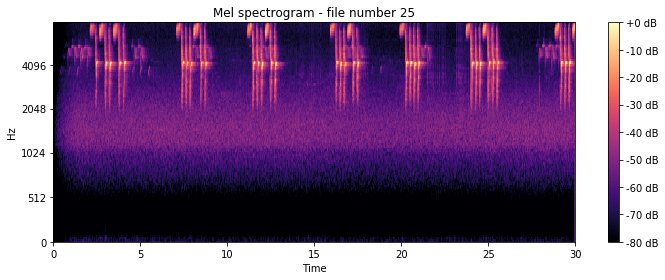

In [8]:
for audioFile in randFiles:
    # path of random file
    filePath = path+'/'+bird['gen']+idData[audioFile]+'.mp3'

    # loading files again
    y, sr = librosa.load(filePath,duration=30)

    # plot mel-spectogram
    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                          y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram - file number '+str(audioFile))
    plt.tight_layout()
    plt.show()